In [54]:
#@author:Kavyashree Sirigere Prakash
#Programming Homework 1


In [56]:
#importing packages and dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [57]:
"""
Sigmoid function is link function for Logistic Regression
y=(1/1+e^-x)
"""
def sigmoid(inner_prod):
    return 1 / (1 + np.exp(-inner_prod))

## Calculating the Log-Likelihood
$$\begin{equation}
ll = \sum_{i=1}^{N}y_{i}\ W ^{T}x_{i} - log(1+e^{\ W^{T}x_{i}})
\end{equation}$$

In [58]:
"""
As log transformations are monotonic ,log lokelihood will not affect weight parameter estimation
np.dot function gives dot product of features and weights vector
inner_prod=[features]*[weights]
Calculating w that maximizes log likelihood of cost function 

"""
def log_likelihood(features, target, weights):
    #calculates dot product of features and weights vector
    inner_prod = np.dot(features, weights)
    #calculating Log likelihood as shown in above equation
    ll = np.sum( target*inner_prod - np.log(1 + np.exp(inner_prod)) )
    return ll

In [59]:
def logistic_regression(features, target, num_steps, learning_rate):
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        #calculates dot product of features and weights vector
        inner_prod = np.dot(features, weights)
        #calculating Probability using Sigmoid function
        predictions = sigmoid(inner_prod)

        # Calculate weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))    
    return weights

In [64]:
"""function that plots an ROC curve with input of a vector containing the true label and another vector containing the
predicted probabilities of class membership for a set of examples"""
def roc_curve_table(probability,target):
    #Reading dependent/target variable and probability data
    df=pd.DataFrame({'True class' :target,'probability': probability})
    #sorting probability values in descending order
    df=df.sort_values('probability',ascending=False)
    #reading unique probability values to a list of threshold values
    threshold= df.probability.unique().tolist()
    #initializing True positive,False positive,False negative and true negative arrays to calculate FPR and TPR
    tp=[]
    fp=[]
    fn=[]
    tn=[]
    
    for i in threshold:
        #counting True positive cases for respective threshold
        tp.append(np.in1d(df.loc[lambda df:df.probability>= i, :],1).sum())
        #counting False positive cases for respective threshold
        fp.append(np.in1d(df.loc[lambda df:df.probability>= i, :],0).sum())
        #counting True negative cases for respective threshold
        tn.append(np.in1d(df.loc[lambda df:df.probability< i, :],0).sum())
        #counting False negative cases for respective threshold
        fn.append(np.in1d(df.loc[lambda df:df.probability> i, :],1).sum())
    #storing these arrays with respective labels    
    roc=pd.DataFrame({'threshold' :threshold,'tp': tp,'tn': tn,'fp': fp,'fn': fn})
    #print(roc.head(2))
    #calculate True positive rate
    roc['tpr']= roc['tp']/(roc['tp']+roc['fn'])
    #calculate False positive rate
    roc['fpr']= roc['fp']/(roc['fp']+roc['tn'])
    return roc

def roc_draw(roc):
    plt.title("ROC curve")
    #Plotting ROC curve with TPR on Y-axis and FPR on X-axis with blue color
    plt.plot(roc.fpr,roc.tpr,'b')
    #Create line plot with red dashed line 
    plt.plot([0,1],[0,1],'r--')
    #X-axis scale limit
    plt.xlim([0,1])
    #Y-axis scale limit
    plt.ylim([0,1])
    #label for Y-axis scale 
    plt.ylabel('True Positive Rate')
    #label for X-axis scale 
    plt.xlabel('False Positive Rate')
    #show the graph
    plt.show()
    return

-670448.6218756185


/Users/kavyashreesp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/Users/kavyashreesp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


-inf
Weights w is 
: [ 3.69851780e+01 -2.14557256e+01  1.37120843e+02  1.07029537e+01
 -3.29732474e-01 -2.53608885e+00 -3.86794636e+00 -1.56739129e+00
 -4.32331941e-01 -4.29643896e-02  7.55844177e-01  4.73258169e-02
 -9.39014142e+00 -2.10128811e+01 -7.45912717e-02 -5.91190295e-01
 -8.68134180e-01 -2.12237124e-01 -1.94991974e-01 -4.89256326e-02
  3.76786787e+01 -6.44999953e+01  6.29609761e+01 -3.23499568e+01
 -7.97230564e-01 -8.27109816e+00 -1.05417556e+01 -2.86615267e+00
 -2.21984796e+00 -6.38100012e-01]
    fn  fp     threshold   tn   tp
0    0   4  1.000000e+00  136  214
1  214   4  3.447337e-63  136  215
ROC table is
     fn   fp      threshold   tn   tp       tpr       fpr
0    0    4   1.000000e+00  136  214  1.000000  0.028571
1  214    4   3.447337e-63  136  215  0.501166  0.028571
2  215    5   3.166024e-83  135  215  0.500000  0.035714
3  215    5   3.184678e-95  135  216  0.501160  0.035714
4  216    5  2.639061e-103  135  217  0.501155  0.035714
5  217    5  1.433394e-158  1

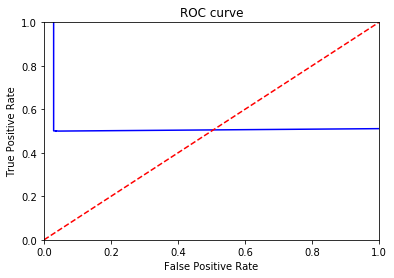

In [65]:
""" Apply your logistic regression classifier to the breast cancer Wisconsin dataset, which can either be loaded with python by following instructions.
Randomly splitting the data into two subsets with one having 2/3 of the examples and the other
one having the rest 1/3. Use the 2/3 subset to train a logistic regression model and the 1/3 subset
to test the model. Plot the ROC curve on the testing set with your ROC plotting function. """
#loading the data
dataset=datasets.load_breast_cancer()
#reading feature /independent variables
X=dataset.data
#reading dependent variable/target variable
y=dataset.target
#splitting data into test and training data set 
#testing dataset size=0.33
#training dataset size=0.66(remaining data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=45)
#calculating weights for training dataset
weights=logistic_regression(X_train, y_train, 20000, 10e-5)

print('Weights w is \n:',weights)
#Calculating probability using sigmoid function
p=sigmoid(np.dot(X_test,weights))
#Calculating ROC table with probability and target variable testing data
roc=roc_curve_table(p,y_test)
print('ROC table is\n',roc)
#plotting ROC curve
roc_draw(roc)

References:
https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
http://www.holehouse.org/mlclass/06_Logistic_Regression.html
